Diabetes Data Analysis.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

Join all the Datasets from teh Diabetes data Folder.

In [ ]:
directory = 'drive/MyDrive/Diabetes-Data'
merge_csv = pd.DataFrame(pd.read_csv("drive/MyDrive/Diabetes-Data/data-01"))
merge_csv.columns = ["Data"]
for filename in os.listdir(directory):
  f = os.path.join(directory,filename)
  if os.path.isfile(f) and f != "Diabetes-Data/data-01":
    m2 = pd.read_csv(f,on_bad_lines = "warn")
    m2.columns = ["Data"]
    merge_csv = pd.concat([merge_csv,m2],axis = 0)

b'Skipping line 3: expected 1 fields, saw 2\nSkipping line 4: expected 1 fields, saw 4\nSkipping line 5: expected 1 fields, saw 2\nSkipping line 6: expected 1 fields, saw 4\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 45: expected 1 fields, saw 2\n'
b'Skipping line 4: expected 1 fields, saw 4\nSkipping line 5: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 29: expected 1 fields, saw 3\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 48: expected 1 fields, saw 2\nSkipping line 49: expected 1 fields, saw 3\n'
b'Skipping line 9: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 21: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 31: expected 1 

In [ ]:
merge_csv = merge_csv["Data"].str.split("\t",n=3,expand = True)

In [ ]:
merge_csv.columns = ["Date","Time","Code","Value"]

In [ ]:
merge_csv.to_csv('merge.csv')

In [ ]:
csv = pd.read_csv("merge.csv")
csv = csv.drop("Unnamed: 0",axis = 1) #vertical
paper_record = csv[csv["Date"].isna()]
paper_record.to_csv("paper_record.csv",index = False)
electronic_record = csv.dropna()
electronic_record.to_csv("ele_rec.csv",index = False)

In [ ]:
dataset = pd.read_csv("ele_rec.csv")
dataset

,Date,Time,Code,Value
0,04-21-1991,9:09,33.0,009
1,04-21-1991,9:09,34.0,013
2,04-21-1991,17:08,62.0,119
3,04-21-1991,17:08,33.0,007
4,04-21-1991,22:51,48.0,123
...,...,...,...,...
30131,05-09-1989,08:00,33.0,001
30132,05-09-1989,08:00,34.0,007
30133,05-10-1989,08:00,34.0,007
30134,05-11-1989,08:00,34.0,007


Convert the string values to Numerical Values.

In [ ]:
clean_dataset = dataset[(dataset["Value"] != "0Hi") * (dataset["Value"] != "0Lo") * (dataset["Value"] != "0''")]
clean_dataset["Value"] = pd.to_numeric(clean_dataset["Value"])
clean_dataset["Code"] = pd.to_numeric(clean_dataset["Code"])
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30128 entries, 0 to 30135
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    30128 non-null  object 
 1   Time    30128 non-null  object 
 2   Code    30128 non-null  float64
 3   Value   30128 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new_dataset = clean_dataset.pivot_table(index = clean_dataset.groupby("Code").cumcount(),columns = "Code",values = "Value")
new_dataset

Code,4.0,33.0,34.0,35.0,36.0,48.0,56.0,57.0,58.0,59.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.0,9.0,13.0,9.0,5.0,123.0,115.0,124.0,216.0,281.0,...,180.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,7.0,13.0,8.0,NaN,340.0,108.0,117.0,257.0,73.0,...,102.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,10.0,13.0,9.0,NaN,288.0,110.0,151.0,239.0,242.0,...,161.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2.0,14.0,8.0,NaN,200.0,116.0,61.0,67.0,242.0,...,123.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,7.0,14.0,9.0,NaN,81.0,121.0,155.0,77.0,168.0,...,229.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9856,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9857,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9858,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove the other Code Values.

In [ ]:
given = [33 ,34, 35 ,48 ,57 ,58, 59 ,60, 61 ,62,63,64,65,66,67 ,68 ,69 ,70 ,71 ,72 ]
neglect = []
for i,j in enumerate(new_dataset.columns):
  if j not in given:
    neglect.append(i)
print(neglect)
new_dataset = new_dataset.drop(new_dataset.columns[neglect],axis = 1)

[0, 4, 6]


In [ ]:
new_dataset.head()

Code,33.0,34.0,35.0,48.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,9.0,13.0,9.0,123.0,124.0,216.0,281.0,192.0,151.0,119.0,180.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,13.0,8.0,340.0,117.0,257.0,73.0,88.0,178.0,211.0,102.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,13.0,9.0,288.0,151.0,239.0,242.0,60.0,192.0,129.0,161.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,14.0,8.0,200.0,61.0,67.0,242.0,81.0,198.0,129.0,123.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,14.0,9.0,81.0,155.0,77.0,168.0,162.0,177.0,206.0,229.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_dataset.columns = ["Regular insulin dose(33)","NPH insulin dose(34)","UltraLente insulin dose(35)",
                 "Unspecified blood glucose measurement(48)"," Unspecified blood glucose measurement(57)","Pre-breakfast blood glucose measurement(58)",
                 "Post-breakfast blood glucose measurement(59)","Pre-lunch blood glucose measurement(60)","Post-lunch blood glucose measurement(61)",
                 "Pre-supper blood glucose measurement(62)","Post-supper blood glucose measurement(63)","Pre-snack blood glucose measurement(64)",
                 "Hypoglycemic symptoms(65)","Typical meal ingestion(66)","More-than-usual meal ingestion(67)",
                 "Less-than-usual meal ingestion(68)","Typical exercise activity(69)","More-than-usual exercise activity(70)","Less-than-usual exercise activity(71)","Unspecified special event(72)"
                ]

In [ ]:
new_dataset

,Regular insulin dose(33),NPH insulin dose(34),UltraLente insulin dose(35),Unspecified blood glucose measurement(48),Unspecified blood glucose measurement(57),Pre-breakfast blood glucose measurement(58),Post-breakfast blood glucose measurement(59),Pre-lunch blood glucose measurement(60),Post-lunch blood glucose measurement(61),Pre-supper blood glucose measurement(62),Post-supper blood glucose measurement(63),Pre-snack blood glucose measurement(64),Hypoglycemic symptoms(65),Typical meal ingestion(66),More-than-usual meal ingestion(67),Less-than-usual meal ingestion(68),Typical exercise activity(69),More-than-usual exercise activity(70),Less-than-usual exercise activity(71),Unspecified special event(72)
0,9.0,13.0,9.0,123.0,124.0,216.0,281.0,192.0,151.0,119.0,180.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,13.0,8.0,340.0,117.0,257.0,73.0,88.0,178.0,211.0,102.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,13.0,9.0,288.0,151.0,239.0,242.0,60.0,192.0,129.0,161.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,14.0,8.0,200.0,61.0,67.0,242.0,81.0,198.0,129.0,123.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,14.0,9.0,81.0,155.0,77.0,168.0,162.0,177.0,206.0,229.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9856,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9857,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9858,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mean.

In [ ]:
new_dataset.mean()

Regular insulin dose(33)                          6.614402
NPH insulin dose(34)                             15.446253
UltraLente insulin dose(35)                      15.862167
Unspecified blood glucose measurement(48)       170.269663
 Unspecified blood glucose measurement(57)      160.378049
Pre-breakfast blood glucose measurement(58)     170.487583
Post-breakfast blood glucose measurement(59)    176.210526
Pre-lunch blood glucose measurement(60)         143.548227
Post-lunch blood glucose measurement(61)        244.515152
Pre-supper blood glucose measurement(62)        156.519213
Post-supper blood glucose measurement(63)       186.460829
Pre-snack blood glucose measurement(64)         148.772124
Hypoglycemic symptoms(65)                         0.000000
Typical meal ingestion(66)                        0.000000
More-than-usual meal ingestion(67)                0.000000
Less-than-usual meal ingestion(68)                0.000000
Typical exercise activity(69)                     0.0000

Median.

In [ ]:
new_dataset.median()

Regular insulin dose(33)                          6.0
NPH insulin dose(34)                             15.0
UltraLente insulin dose(35)                      15.0
Unspecified blood glucose measurement(48)       160.0
 Unspecified blood glucose measurement(57)      142.5
Pre-breakfast blood glucose measurement(58)     161.0
Post-breakfast blood glucose measurement(59)    187.0
Pre-lunch blood glucose measurement(60)         134.0
Post-lunch blood glucose measurement(61)        225.0
Pre-supper blood glucose measurement(62)        147.0
Post-supper blood glucose measurement(63)       183.0
Pre-snack blood glucose measurement(64)         125.0
Hypoglycemic symptoms(65)                         0.0
Typical meal ingestion(66)                        0.0
More-than-usual meal ingestion(67)                0.0
Less-than-usual meal ingestion(68)                0.0
Typical exercise activity(69)                     0.0
More-than-usual exercise activity(70)             0.0
Less-than-usual exercise act

Mode.

In [ ]:
new_dataset.mode()

,Regular insulin dose(33),NPH insulin dose(34),UltraLente insulin dose(35),Unspecified blood glucose measurement(48),Unspecified blood glucose measurement(57),Pre-breakfast blood glucose measurement(58),Post-breakfast blood glucose measurement(59),Pre-lunch blood glucose measurement(60),Post-lunch blood glucose measurement(61),Pre-supper blood glucose measurement(62),Post-supper blood glucose measurement(63),Pre-snack blood glucose measurement(64),Hypoglycemic symptoms(65),Typical meal ingestion(66),More-than-usual meal ingestion(67),Less-than-usual meal ingestion(68),Typical exercise activity(69),More-than-usual exercise activity(70),Less-than-usual exercise activity(71),Unspecified special event(72)
0,6.0,18.0,30.0,101.0,37.0,147.0,87.0,92.0,136.0,92.0,257.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,60.0,NaN,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Visualization.

Histogram.

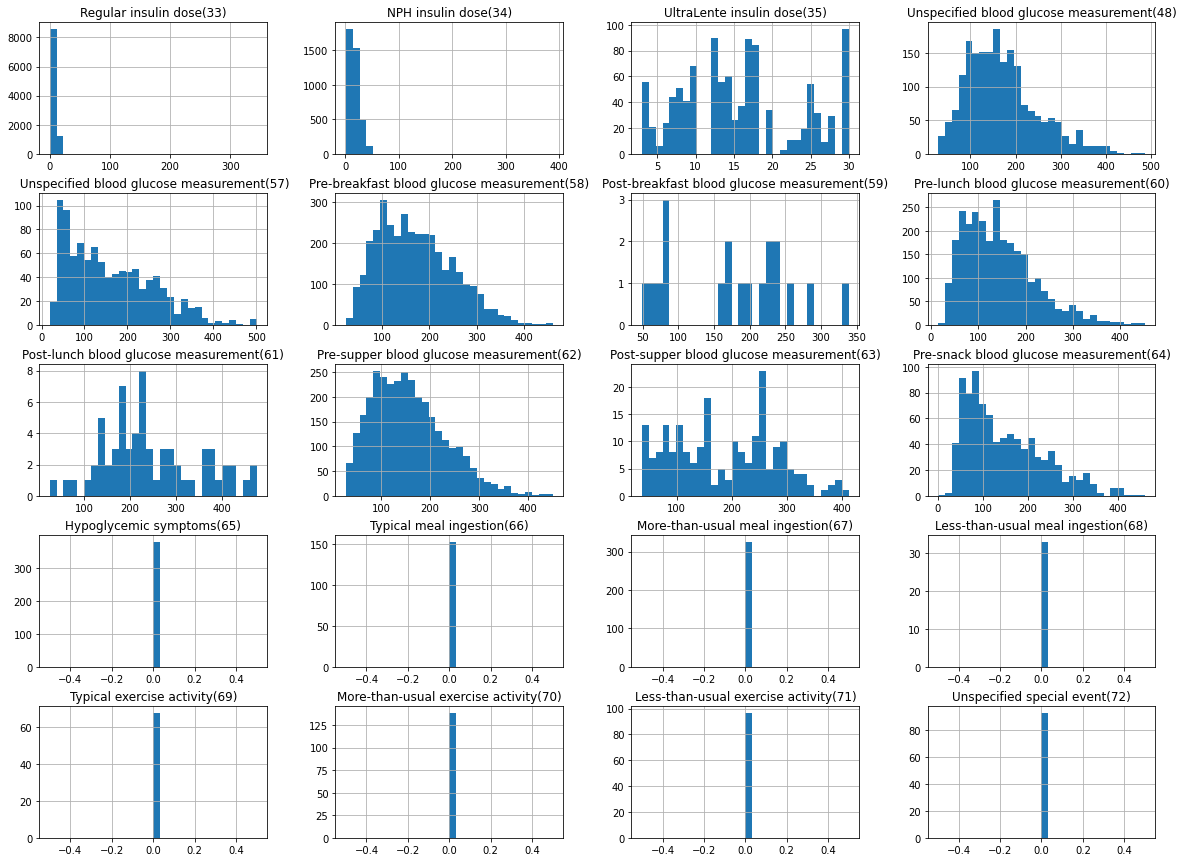

In [ ]:
new_dataset.hist(bins = 30,figsize = (20,15))
plt.show()

Boxplot.

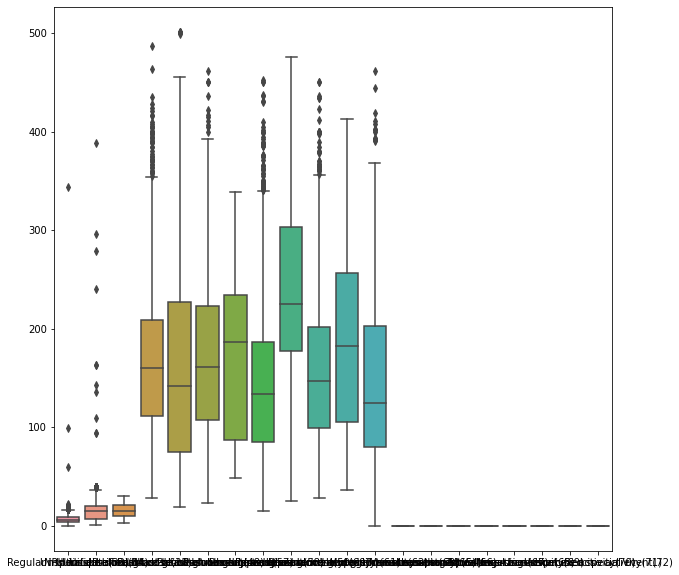

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
sns.boxplot(data = new_dataset,orient = "v" )

Correlation between 2 features.

In [ ]:
new_dataset.corr()

,Regular insulin dose(33),NPH insulin dose(34),UltraLente insulin dose(35),Unspecified blood glucose measurement(48),Unspecified blood glucose measurement(57),Pre-breakfast blood glucose measurement(58),Post-breakfast blood glucose measurement(59),Pre-lunch blood glucose measurement(60),Post-lunch blood glucose measurement(61),Pre-supper blood glucose measurement(62),Post-supper blood glucose measurement(63),Pre-snack blood glucose measurement(64),Hypoglycemic symptoms(65),Typical meal ingestion(66),More-than-usual meal ingestion(67),Less-than-usual meal ingestion(68),Typical exercise activity(69),More-than-usual exercise activity(70),Less-than-usual exercise activity(71),Unspecified special event(72)
Regular insulin dose(33),1.000000,-0.113628,0.205854,-0.076072,-0.001516,0.034979,0.063595,-0.052614,-0.057298,0.040015,-0.018772,0.142130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPH insulin dose(34),-0.113628,1.000000,-0.062946,-0.001524,0.099128,-0.033946,-0.340842,-0.037812,0.014372,-0.080327,-0.099229,-0.095876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UltraLente insulin dose(35),0.205854,-0.062946,1.000000,-0.072570,0.000787,-0.029029,0.512132,0.036630,-0.295327,-0.084558,-0.153348,0.181709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unspecified blood glucose measurement(48),-0.076072,-0.001524,-0.072570,1.000000,0.003721,-0.007341,0.199956,-0.078636,-0.023987,0.022558,0.020801,0.007621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unspecified blood glucose measurement(57),-0.001516,0.099128,0.000787,0.003721,1.000000,0.006011,0.011276,0.008078,-0.152614,0.021132,-0.126928,-0.135892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-breakfast blood glucose measurement(58),0.034979,-0.033946,-0.029029,-0.007341,0.006011,1.000000,-0.296460,-0.049630,-0.182392,0.040139,-0.036327,-0.059723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post-breakfast blood glucose measurement(59),0.063595,-0.340842,0.512132,0.199956,0.011276,-0.296460,1.000000,0.092719,-0.125937,0.378931,0.090167,0.064208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-lunch blood glucose measurement(60),-0.052614,-0.037812,0.036630,-0.078636,0.008078,-0.049630,0.092719,1.000000,0.071476,-0.022595,-0.173108,-0.014938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post-lunch blood glucose measurement(61),-0.057298,0.014372,-0.295327,-0.023987,-0.152614,-0.182392,-0.125937,0.071476,1.000000,-0.107648,-0.006565,0.266046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-supper blood glucose measurement(62),0.040015,-0.080327,-0.084558,0.022558,0.021132,0.040139,0.378931,-0.022595,-0.107648,1.000000,0.008115,-0.032495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Scatter Plot.

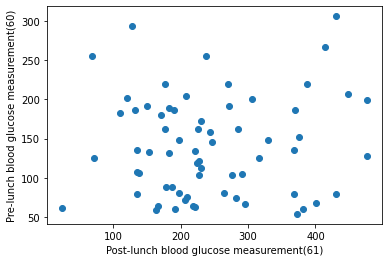

In [ ]:
plt.scatter(new_dataset["Post-lunch blood glucose measurement(61)"],new_dataset["Pre-lunch blood glucose measurement(60)"])
plt.xlabel("Post-lunch blood glucose measurement(61)")
plt.ylabel("Pre-lunch blood glucose measurement(60)")
plt.show()

In [ ]:
selected_data = pd.concat((new_dataset["Post-lunch blood glucose measurement(61)"],new_dataset["Pre-lunch blood glucose measurement(60)"]),axis = 1).dropna()
selected_data

,Post-lunch blood glucose measurement(61),Pre-lunch blood glucose measurement(60)
0,151.0,192.0
1,178.0,88.0
2,192.0,60.0
3,198.0,81.0
4,177.0,162.0
...,...,...
61,219.0,64.0
62,316.0,125.0
63,370.0,187.0
64,69.0,255.0


Linear Regression

Split the data into training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_data[["Pre-lunch blood glucose measurement(60)"]],selected_data["Post-lunch blood glucose measurement(61)"],test_size = 0.2)

In [ ]:
len(x_test),len(x_train)

(14, 52)

Fitting the Regression Model.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,x_train)

LinearRegression()

Plotting the Regression line:

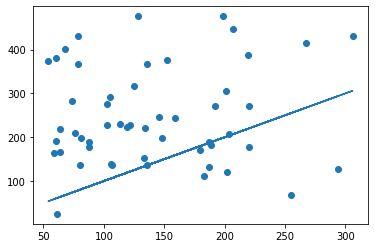

In [ ]:
m = model.coef_[0]
b = model.intercept_
plt.scatter(x_train,y_train)
plt.plot(x_train,m*x_train+b)
plt.show()